In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Overview of Distributions

## General Notes


When they say *marginal likelihood* they mean *evidence* I.e the normalizing constant in Bayes theorem $p(y)$.

**Important Rules:**

1. $p(x,y) = p(x|y)p(y) = p(y|x)p(x)$
2. $p(x,y) = p(x)p(y)$ if $x$ and $y$ are independent
3. $p(x|y) = \frac{p(x,y)}{p(y)}$
4. $p(x|y) = \frac{p(y|x)p(x)}{p(y)}$

For distributions we use `cdf` for calculating probabilities 'above' a certain value and `pdf` for calculating probabilities 'at' a certain value.

The evidence for a Beta-binomial distribution evaluates to this:

$$\begin{align*}
p(y) &= \int {N\choose y} \theta^{y}(1-\theta)^{N-y} \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{B(y+\alpha_0, N-y+\beta_0)}{B(\alpha_0,\beta_0)} \\
\end{align*}$$

### Bishop Smart Places

**(3.86) and (3.82)**: Maximum Likelihood Estimation type II Estimation (Evidence Approximation $p(y)$)

### Conjugate priors

| Likelihood          | Model Parameters | Conjugate prior (and posterior) distribution | Prior hyperparameters | Posterior hyperparameters    | Posterior predictive |
|---------------------|------------------|----------------------------------------------|-----------------------|---------------------------------------|-------------------------------|
| $p(x \mid \theta)$  | $\theta$         | $p(\theta)$, $p(\theta \mid x, \theta')$    | $\Theta$              | $\Theta'$                            | $p(x \mid \theta')$          |
| **Bernoulli**       | $p$ (probability)| Beta                                         | $\alpha, \beta \in \mathbb{R}$ | $\alpha + \sum_{i=1}^n x_i, \beta + n - \sum_{i=1}^n x_i$ | $\frac{\alpha'}{\alpha' + \beta'}$ (Bernoulli) |
| **Binomial**        | $p$ (probability)| Beta                                         | $\alpha, \beta \in \mathbb{R}$ | $\alpha + \sum_{i=1}^n x_i, \beta + n m - \sum_{i=1}^n x_i$ | $\text{BetaBin}\left(\alpha', \beta', m\right)$ (Beta-binomial) |
| **Negative binomial** | $p$ (probability)| Beta                                       | $\alpha, \beta \in \mathbb{R}$ | $\alpha + rm, \beta + \sum_{i=1}^n x_i$ | $\text{BetaNegBin}\left(\alpha', \beta', r\right)$ (Beta-negative binomial) |
| **Poisson**         | $\lambda$ (rate)  | Gamma                                       | $k, \theta \in \mathbb{R}$ | $k + \sum_{i=1}^n x_i, \theta + n$ | $\text{NB}\left(\frac{k'}{\theta'}, 1\right)$ (Negative binomial) |
| **Categorical**     | $p$ (vector, $k$ categories) | Dirichlet                           | $\alpha \in \mathbb{R}^k$ | $\alpha + (c_1, \dots, c_k)$, where $c_i$ is the number of observations in category $i$ | $\frac{\alpha'_i}{\sum_{j=1}^k \alpha'_j}$ (Categorical) |
| **Multinomial**     | $p$ (vector, $k$ categories) | Dirichlet                           | $\alpha \in \mathbb{R}^k$ | $\alpha + \sum_{i=1}^n x_i$ | $\text{DirMult}\left(\alpha'\right)$ (Dirichlet-multinomial) |
| **Continuous Below** | - | - | - | - | - |
| **Normal**          | $\mu, \sigma^2$  | Normal | $\mu_0, \sigma_0^2$ | $\frac{\sigma_0^2}{\sigma_0^2 + n\sigma^2} \bar{x} + \frac{n\sigma^2}{\sigma_0^2 + n\sigma^2} \mu_0, \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}$ | $\text{Normal}\left(\mu', \sigma'^2\right)$ |
| **Gamma**           | $\alpha, \beta$  | Gamma-Gamma                                   | $k, \theta, a, b$ | $k + n, \theta + \sum_{i=1}^n x_i, a + n\bar{x}, b + n$ | $\text{Gamma}\left(a', b'\right)$ |
| **Inverse Gamma**   | $\alpha, \beta$  | Inverse Gamma                                 | $\alpha, \beta$ | $\alpha + \frac{n}{2}, \beta + \frac{1}{2} \sum_{i=1}^n x_i^2$ | $\text{Inv-Gamma}\left(\alpha', \beta'\right)$ |
| **Beta**            | $\alpha, \beta$  | Beta                                          | $\alpha, \beta$ | $\alpha + \sum_{i=1}^n x_i, \beta + n - \sum_{i=1}^n x_i$ | $\text{Beta}\left(\alpha', \beta'\right)$ |


## Normal Distribution

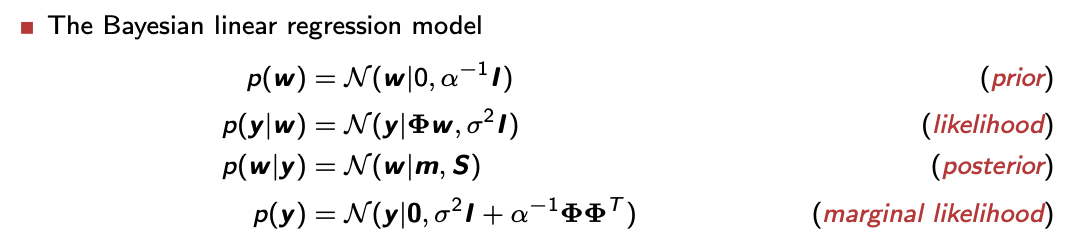

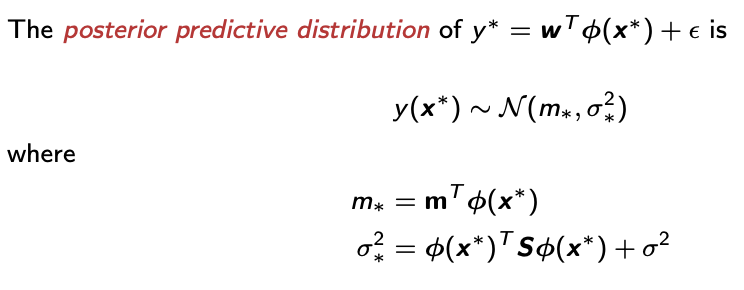

**Normal**

$$
\begin{align*}
\mathcal{N}(x|\mu,\sigma^2) &= \frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\} \\
\end{align*}
$$

**Log Normal**

$$
\ln \mathcal{N}\left(x \mid \mu, \sigma^2\right)=-\frac{1}{2 \sigma^2} x^2+\frac{\mu}{\sigma^2} x+K
$$

## Poisson Distribution

The *poisson* dsitribution is used for *count* data and has the following form:
$$
p(y | \lambda)=\frac{\lambda^y e^{-\lambda}}{y!},
$$
where
- $y$ is the number of occurrences $(k=0,1,2, \ldots)$
- $e$ is Euler's number $(e=2.71828 \ldots)$
- $k!=k(k-1) \cdots(3)(2)(1)$ is the factorial.


The likelihood of the Poisson distribution is:
$$
L(\lambda | y)=\prod_{i=1}^{n} \frac{\lambda^{y_{i}} e^{-\lambda}}{y_{i} !}
$$

or 

$$
\log L(\lambda | y)=\sum_{i=1}^{n}\left(y_{i} \log (\lambda)-\lambda-\log \left(y_{i}!\right)\right)
$$

**Log Joint Distribution**
With a model on form:

$$
\begin{aligned}
y_n \mid \boldsymbol{w}, x_n & \sim \operatorname{Poisson}\left(\lambda_n\right) \\
\lambda_n & =e^{w_0+w_1 x_n} \\
\boldsymbol{w} & \sim \mathcal{N}\left(\mathbf{0}, \alpha^{-1} \boldsymbol{I}\right)
\end{aligned}
$$

The log joint distribution is:
\begin{aligned}
\log p(\boldsymbol{y}, \boldsymbol{w}) & =\sum_{n=1}^N \log p\left(y_n \mid \boldsymbol{w}, x_n\right)+\log p(\boldsymbol{w}) \\
& =-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N \log \frac{\lambda_n^{y_n} e^{-\lambda_n}}{y_{n}!} \\
& =-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N\left[y_n \log \lambda_n-\lambda_n+\log \frac{1}{y_{n}!}\right] \\
& =-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N\left[y_n \log \lambda_n-\lambda_n\right]+K \\
& =-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N y_n \log \lambda_n-\sum_{n=1}^N \lambda_n+K
\end{aligned}

## The Binomial distribution

First we re-cap the ***Binomial distribution***. The Binomial distribution is a discrete probability distribution representing the number of successes in a sequence of **independent Bernoulli trials** and it is specified through its **probability mass function (PMF)**:

$$
\begin{align*}
p(y|N, \theta) &= \text{Bin}(y|N, \theta)\\
&= {N\choose y} \theta^{y}(1-\theta)^{N-y},
\end{align*}$$

where $N$ is the number of trials, $\theta \in \left[0, 1\right]$ is the probability of success in each individual trial and $y \in \left\lbrace 0, 1, \dots, N \right\rbrace$ is the total number of successes. The quantity ${N\choose y}$ is a called a binomial coefficient and is pronounced "$N$ choose $y$" and counts the number of ways $y$ items can be chosen from a set of $N$ items. The simplest way to estimate $\theta$ is through **maximum likelihood estimation (MLE)**, which for this model can be done analytically:

$$\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} p(y|N, \theta) = \frac{y}{N}.$$

We can also compute a classic/frequentist 95%-**confidence interval**:

$$\hat{\theta}_{\text{MLE}} \pm 1.96 \sqrt{\frac{\hat{\theta}_{\text{MLE}}(1-\hat{\theta}_{\text{MLE}})}{N}}.$$

Technically, this type of interval is called a **Wald interval** and relies on a Gaussian approximation, but we won't cover these details in this course. Note that a **confidence interval** is **generally not** the same as a **posterior credibility interval** (see Section 4.6.6 in Murphy1). 

## The Beta Distribution

The ***Beta distribution*** is distribution over random variables in the unit interval. The **probability density function (PDF)** of the Beta distribution  has two parameters $\alpha_0 > 0$ and $\beta_0 > 0$ and is given by

$$p(\theta|\alpha_0,\beta_0) = \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1},$$

where $B(\alpha_0, \beta_0)$ is a normalization function that ensures that the density integrates to one:

$$B(\alpha_0,\beta_0) = \int \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta = \frac{\Gamma(\alpha_0)\Gamma(\beta_0)}{\Gamma(\alpha_0+\beta_0)},$$

where $\Gamma$ is the so-called gamma function, which we won't dive deeper into in this course. Since $B(\alpha_0,\beta_0)$ is a constant wrt. $\theta$, it holds that

$$p(\theta|\alpha_0,\beta_0) \propto \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1},$$

and therefore, we say that $f(\theta) = \theta^{a-1}(1-\theta)^{b-1}$ is the **functional form** of a Beta distribution for some $a,b > 0$.

The **mean** of a Beta-distributed random variable, $\theta \sim \text{Beta}(\alpha_0, \beta_0)$, is given by

$$\mathbb{E}\left[\theta\right] = \int_0^1 \theta \, p(\theta|\alpha_0,\beta_0) \,\text{d} \theta  = \frac{\alpha_0}{\alpha_0+\beta_0}. \tag{1}$$

The quantity $\mathbb{E}\left[\theta\right]$ is also sometimes refered to as the **expected value** of $\theta$ or the **first moment** of $\theta$. The **variance** of $\theta$ is

$$\mathbb{V}\left[\theta\right] = \int_0^1 \left(\theta - \mathbb{E}\left[\theta\right] \right)^2 \, p(\theta|\alpha_0,\beta_0) \,\text{d} \theta  = \frac{\alpha_0 \beta_0}{(\alpha_0+\beta_0)^2(\alpha_0+\beta_0+1)}.$$

When $\alpha_0, \beta_0 > 1$ the Beta density is unimodal with the mode given by 

$$\theta_{\text{mode}} = \frac{\alpha_0 - 1}{\alpha_0 + \beta_0 - 2}.$$

## Beta Binomial model

\begin{align*}
p(\theta) &= \text{Beta}(\theta \mid a_0, b_0) \quad &\text{(Prior)} \\
p(y \mid \theta) &= \binom{N}{y} \theta^y (1 - \theta)^{N-y} \quad &\text{(Likelihood)} \\
p(\theta \mid y) &= \text{Beta}(\theta \mid y + a_0, N - y + b_0) \quad &\text{(Posterior)}
\end{align*}

We can express the evidence of a beta-Binomial model as:

$$\begin{align*}
p(y) &= \int {N\choose y} \theta^{y}(1-\theta)^{N-y} \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} \int  \theta^{y}(1-\theta)^{N-y} \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} \int  \theta^{y+\alpha_0-1}(1-\theta)^{N-y+\beta_0-1}  \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} B(y+\alpha_0, N-y+\beta_0)\\
%
&= {N\choose y}\frac{B(y+\alpha_0, N-y+\beta_0)}{B(\alpha_0,\beta_0)} \\
\end{align*}$$

**The joint distribution** of all variables can be expressed via the **product rule**:

$$ p(\theta, y) = p(y \mid \theta) p(\theta) $$

**The posterior distribution** can be obtained by **conditioning on y**:

$$ p(\theta \mid y) = \frac{p(y, \theta)}{p(y)} = \frac{p(y \mid \theta) p(\theta)}{p(y)} $$

**The evidence** $ p(y) $ can be obtained from the joint distribution via the **sum rule**:

$$ p(y) = \int p(y, \theta) d\theta = \int p(y \mid \theta) p(\theta) d\theta $$


We can consider a model with a predictive likelihood from **Slide 11 Week 2**:

  $$ p(y \mid \theta) = \text{Bin}(y \mid N, \theta) \tag{Likelihood} $$

  $$ p(y^* \mid \theta) = \text{Bin}(y^* \mid N^*, \theta) \tag{Predictive likelihood} $$

  $$ p(\theta) = \text{Beta}(\theta \mid a_0, b_0) \tag{Prior}$$

We know how to compute the **posterior distribution**:
$$ p(\theta \mid y) = \text{Beta}(\theta \mid y + a_0, N - y + b_0) $$

Next, we want to compute the **posterior predictive distribution**:
$$ p(y^* \mid y) = \int p(y^* \mid \theta) p(\theta \mid y) d\theta = \int \text{Bin}(y^* \mid N^*, \theta) \text{Beta}(\theta \mid y + a_0, N - y + b_0) d\theta $$


## Gamma Distribution

In [ ]:
# Apparently it is ok to assume the Log Gamma to be
log_gamma = lambda a: -a # + constant

# Sampling

## Monte Carlo Sampling

We use *Monte Carlo* sampling as defined in **Week 8** of the course:

$$
\mathbb{E}_{p(\theta \mid y)}[\theta]=\int \theta p(\theta \mid y) \mathrm{d} \theta \approx \frac{1}{S} \sum_{i=1}^S \theta^{(i)}, \quad \theta^{(i)} \sim p(\theta \mid y)
$$

Working for any function:

$$
\mathbb{E}_{p(\theta \mid y)}[f(\theta)]=\int f(\theta) p(\theta \mid y) \mathrm{d} \theta \approx \frac{1}{S} \sum_{i=1}^S f(\theta^{(i)}), \quad \theta^{(i)} \sim p(\theta \mid y)
$$

# Approximation Methods

## Grid Approximation
**Week 2**

Constructing the grid approximation for $p(\theta \mid y)$

1. We define a set of grid points for $\theta$: $0 \leq \theta_1 < \theta_2 < \cdots < \theta_M \leq 1$
2. We evaluate the exact posterior (up to a constant) at all the grid points, i.e. $\tilde{\pi}_i \propto p(\theta_i \mid y) \propto p(y \mid \theta_i)p(\theta_i)$
3. Sum all values to get normalization constant $Z = \sum_{j=1}^M \tilde{\pi}_j$
4. Compute normalized probabilities $\pi_i = \frac{1}{Z} \tilde{\pi}_i$ **to get the grid approximation**:
   $$ q(\theta) = \sum_{i=1}^M \pi_i \delta(\theta - \theta_i) $$


In [ ]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, alphas, betas, func, name="Grid2D"):
        self.alphas = alphas
        self.betas = betas
        self.grid_size = (len(self.alphas), len(self.betas))
        self.alpha_grid, self.beta_grid = np.meshgrid(alphas, betas, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.alphas, self.betas, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size)
        return self.alphas[alpha_idx], self.betas[beta_idx]

num_alpha, num_beta = 90, 100
alphas = np.linspace(-4, 4, num_alpha)
betas = np.linspace(-4, 4, num_beta)

# evalute log prior, log likelihood and log joint on the (alpha, beta)-grid
model = LogisticRegression(x, y, N, sigma2_alpha=1.0, sigma2_beta=1.0)
log_prior_grid = Grid2D(alphas, betas, model.log_prior, 'Prior')
log_lik_grid = Grid2D(alphas, betas, model.log_likelihood, 'Likelihood')
log_joint_grid = Grid2D(alphas, betas, model.log_joint, 'Posterior')

# Plug-in Method

If we **assume** that there is a **single best parameter** $ \hat{\theta} $, e.g., $ \hat{\theta}_{MLE} $ or $ \hat{\theta}_{MAP} $, then we can approximate $ p(\theta \mid y) $ using a **Dirac's delta function** $ \delta(\theta - \hat{\theta}) $:

$$ p(\theta \mid y) \approx \delta(\theta - \hat{\theta}) $$

Using the **sifting property** of Dirac's delta implies:

$$ p(y^* \mid y) = \int p(y^* \mid \theta) p(\theta \mid y) d\theta \approx \int p(y^* \mid \theta) \delta(\theta - \hat{\theta}) d\theta = p(y^* \mid \hat{\theta}) $$


This essentially means, that given some $x^*$ we just use either the $w_{MLE}$ or $w_{MAP}$ weight parameters for estimating y. This is what is done in most Machine Learning approaches and neural networks, but we lose all uncertainty quantification.